# MLxtend: A Python Library with interesting tools for data science tasks

This notebook is accompanying the article [MLxtend: A Python Library with interesting tools for data science tasks](https://www.ealizadeh.com/blog/mlxtend-library-for-data-science/). 

You can also download a free one-page summary of this post at [https://ealizadeh.com](https://www.ealizadeh.com/wp-content/uploads/2020/12/mlxtend-one-page-summary.pdf).


**Website: https://ealizadeh.com**

**Medium: https://medium.com/@ealizadeh**

**Twitter: https://twitter.com/es_alizadeh**

Copyright © 2020 Esmaeil Alizadeh

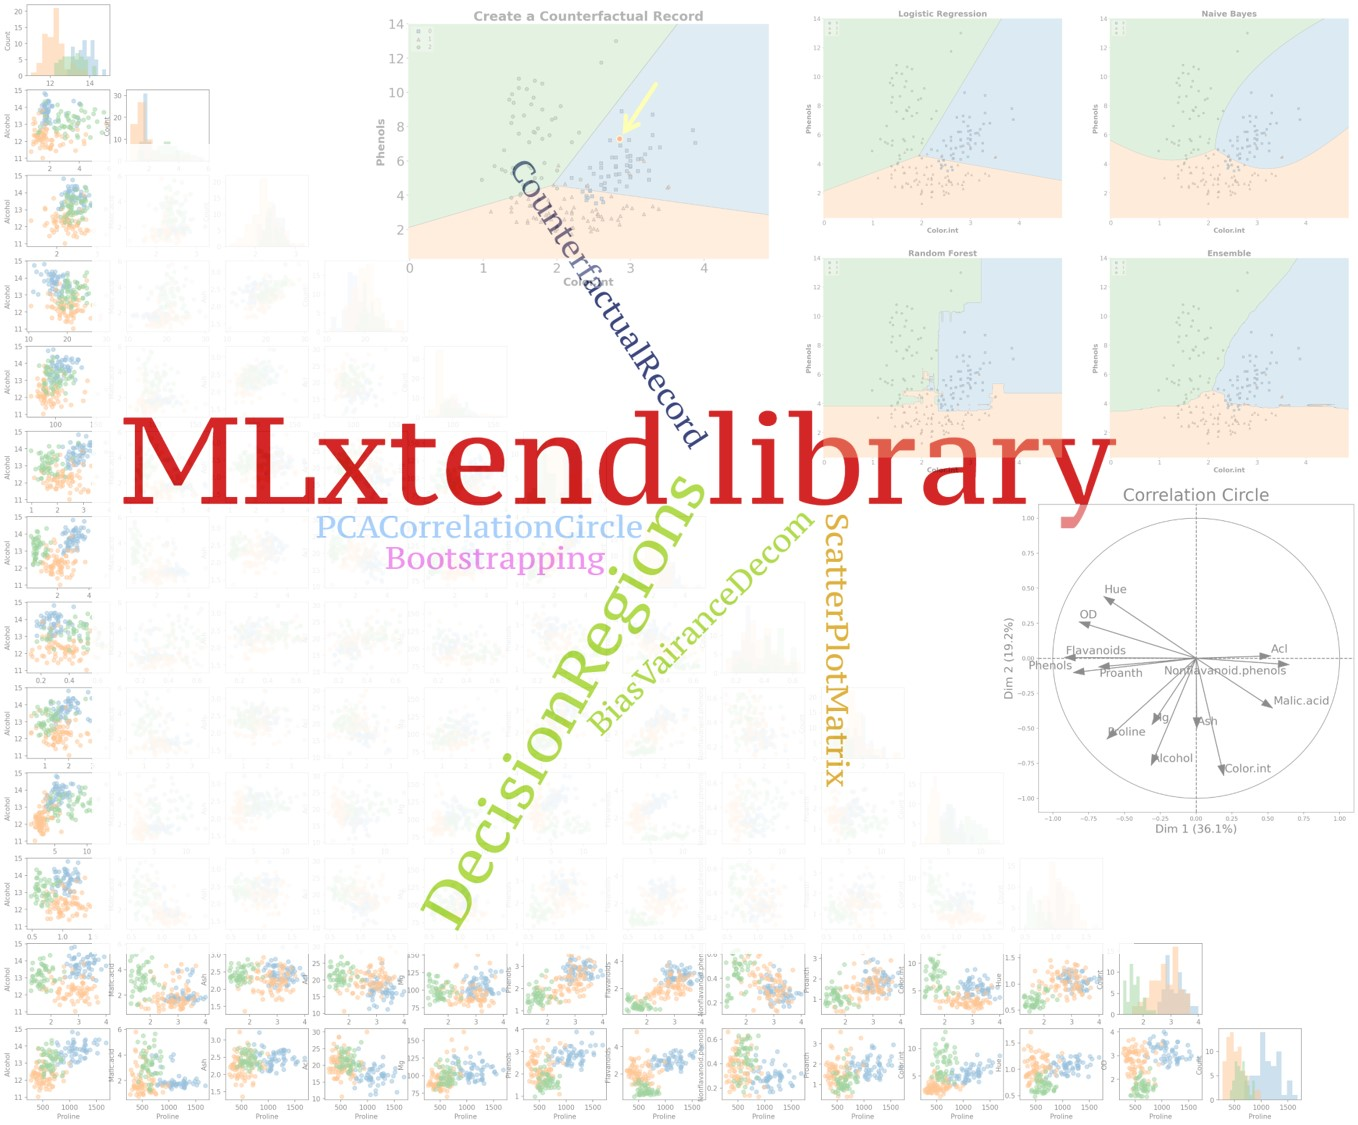

In [1]:
from IPython.display import Image
Image("https://www.ealizadeh.com/wp-content/uploads/2020/12/mlxtend_featured_image.jpg", width=600)

---

[MLxtend](https://rasbt.github.io/mlxtend/) library (Machine Learning extensions) has many interesting functions for everyday data analysis and machine learning tasks. Although there are many machine learning libraries available for Python such as [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/), [Keras](https://keras.io/), [PyTorch](https://pytorch.org/), etc, however, MLxtend offers additional functionalities to other popular ML libraries and can be a valuable addition to your data science toolbox.

In this post, I will go over several tools of the library, in particular, I will cover:
- Create counterfactual (for model interpretability)
- PCA correlation circle
- Bias-variance decomposition 
- Decision regions of classification models
- Matrix of scatter plots
- Bootstrapping

For a list of all functionalities this library offers, you can visit MLxtend's [homepage](https://rasbt.github.io/mlxtend/).

Note: For convenience, all functions mentioned in this post are hyperlinks to their corresponding API documentation. 

MLxtend library is developed by [Sebastian Raschka](https://sebastianraschka.com/) (a professor of statistics at the University of Wisconsin-Madison). The library has nice API documentation as well as many examples. 

In [2]:
import pandas as pd
import numpy as np

# Matplotlib 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

## Preparation

### Installation
You can install the MLxtend package through the Python Package Index (PyPi) by running `pip install mlxtend`.

### Dataset
Here, I'm using the wine data set obtained from the [Kaggle](https://www.kaggle.com/tug004/3wine-classification-dataset). The data contains 13 attributes of alcohol for three types of wine. This is a multiclass classification dataset, and you can find the description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/wine). 

First, let's import the data and prepare the input variables (feature set $X$) and the output variable (target $y$).

In [3]:
# Load wine data set (the dataset is available at https://www.kaggle.com/tug004/3wine-classification-dataset)
df = pd.read_csv("./data/wine.csv")

# Target values (wine classes) in y
y_s = df["Wine"].map({1: 0, 2: 1, 3: 2}) # Convert classes 1, 2, 3 to 0, 1, 2 to avoid strange behavior 
y = y_s.values

# Feature columns 
X_df = df.drop(columns=["Wine"])
X = X_df.values
attribute_names = X_df.columns

X_2d= X_df[["Phenols", "Color.int"]].values

## MLxtend Functionalities

### Create Counterfactual (for model interpretability)
For creating counterfactual records (in the context of machine learning), we need to modify the features of some records from the training set in order to change the model prediction$^{[2]}$. This may be helpful in explaining the behavior of a trained model. The algorithm used in the library to create counterfactual records is developed by Wachter *et al*$^{[3]}$. 

You can create counterfactual records using [*create_counterfactual()*](https://rasbt.github.io/mlxtend/user_guide/evaluate/create_counterfactual/) from the library. Note that this implementation works with any scikit-learn estimator that supports the `predict()` function. Below is an example of creating a counterfactual record for an ML model. The counterfactual record is highlighted in a red dot within the classifier's decision regions (we will go over how to draw decision regions of classifiers later in the post).

In [4]:
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression(random_state=0)
clf_logistic_regression.fit(X_2d, y)

LogisticRegression(random_state=0)

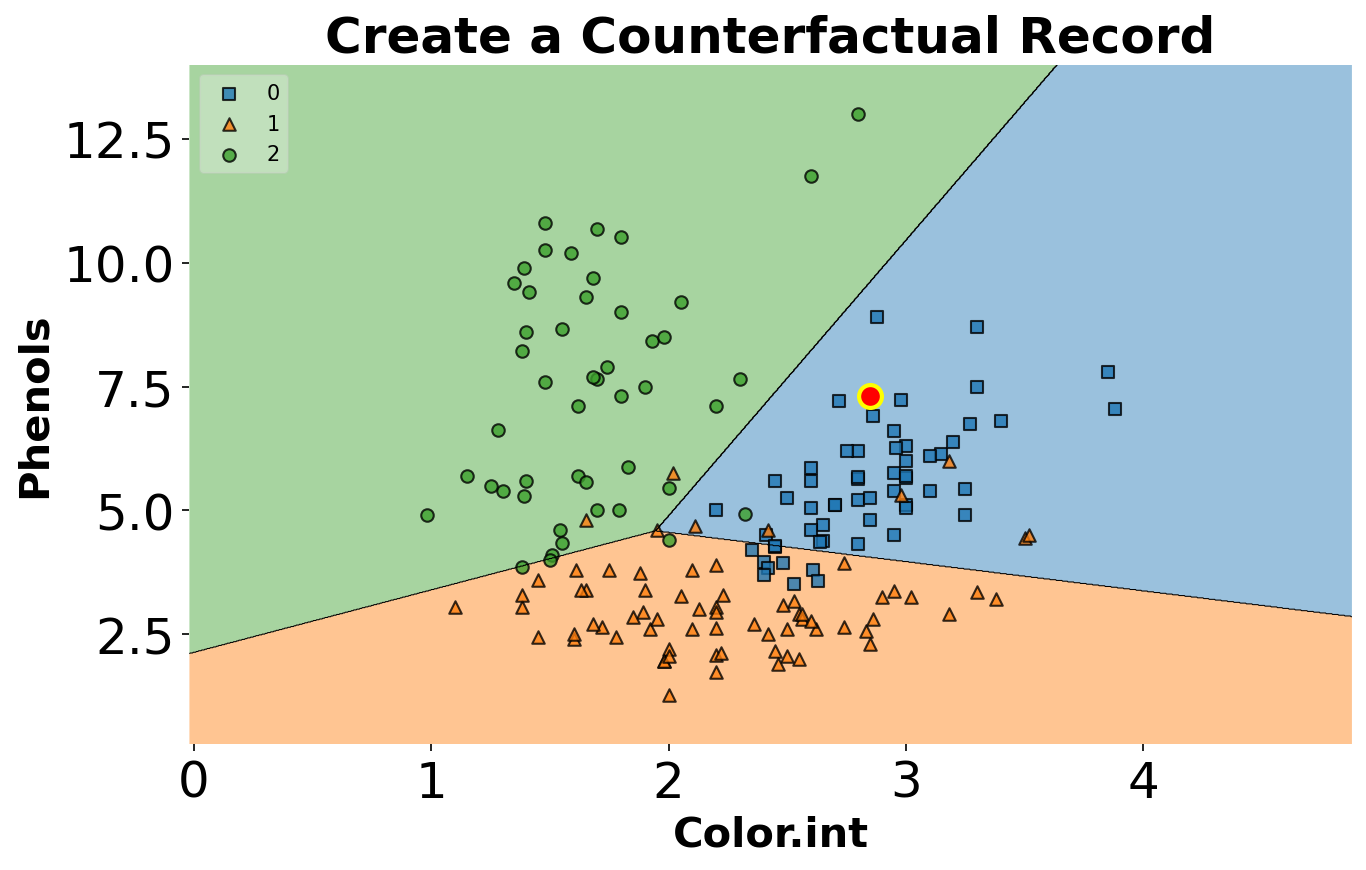

In [5]:
from mlxtend.evaluate import create_counterfactual
from mlxtend.plotting import plot_decision_regions

counterfact = create_counterfactual(
    x_reference=X_2d[15], 
    y_desired=2, # Desired class
    model=clf_logistic_regression, 
    X_dataset=X_2d,
    y_desired_proba=0.95,
    lammbda=1, 
    random_seed=123
)

scatter_highlight_defaults = {
    'c': 'red',
    'edgecolor': 'yellow',
    'alpha': 1.0,
    'linewidths': 2,
    'marker': 'o',
    's': 120
}


fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_regions(X_2d, y, clf=clf_logistic_regression, legend=2, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Create a Counterfactual Record", fontsize=24, fontweight="bold")
ax.set_xlabel("Color.int", fontsize=20, fontweight="bold")
ax.set_ylabel("Phenols", fontsize=20, fontweight="bold")

ax.scatter(
    *counterfact,
    **scatter_highlight_defaults
)

fig.savefig("counterfactual_instance.png", **savefig_options)

### PCA Correlation Circle 
An interesting and different way to look at PCA results is through a correlation circle that can be plotted using [*plot_pca_correlation_graph()*](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/). We basically compute the correlation between the original dataset columns and the PCs (principal components). Then, these correlations are plotted as vectors on a unit-circle. The axes of the circle are the selected dimensions (a.k.a. PCs). You can specify the PCs you're interested in by passing them as a tuple to dimensions function argument. The correlation circle axes labels show the percentage of the [explained variance](https://en.wikipedia.org/wiki/Explained_variation) for the corresponding PC $^{[1]}$.

Remember that normalization is important in PCA because the PCA projects the original data on to the directions that maximize the variance. 

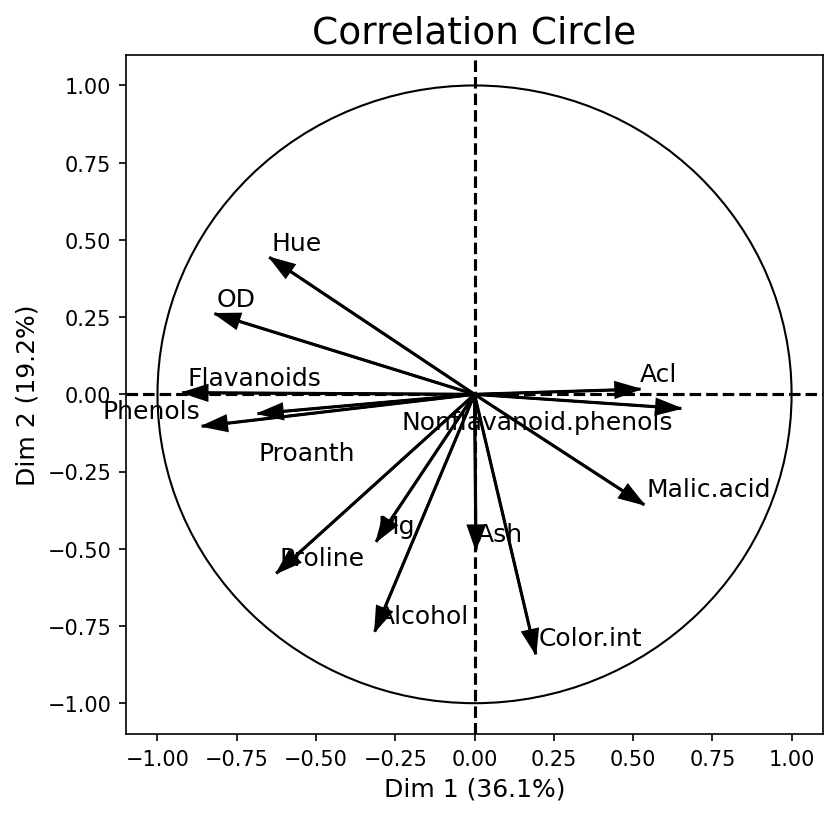

In [6]:
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X) # Normalizing the feature columns is recommended (X - mean) / std

fig, correlation_matrix = plot_pca_correlation_graph(
    X_norm, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=6
)
fig.savefig("correlation_circle_dim1_vs_dim2.png", **savefig_options)

In [7]:
correlation_matrix

Dim 1     Dim 2
Alcohol              -0.313093 -0.764257
Malic.acid            0.531885 -0.355432
Ash                   0.004449 -0.499446
Acl                   0.519157  0.016735
Mg                   -0.308023 -0.473476
Phenols              -0.856137 -0.102774
Flavanoids           -0.917470  0.005309
Nonflavanoid.phenols  0.647607 -0.045477
Proanth              -0.679922 -0.062104
Color.int             0.192236 -0.837489
Hue                  -0.643662  0.441242
OD                   -0.816019  0.259934
Proline              -0.622051 -0.576613

### Bias-Variance Decomposition
You often hear about the bias-variance tradeoff to show the model performance. In supervised learning, the goal often is to minimize both the bias error (to prevent underfitting) and variance (to prevent overfitting) so that our model can generalize beyond the training set$^{[4]}$. This process is known as a bias-variance tradeoff. 

Note that we cannot calculate the actual bias and variance for a predictive model, and the bias-variance tradeoff is a concept that an ML engineer should always consider and tries to find a sweet spot between the two.
Having said that, we can still study the model's expected generalization error for certain problems. In particular, we can use the bias-variance decomposition to decompose the generalization error into a sum of 1) bias, 2) variance, and 3) irreducible error$^{[4, 5]}$. 

The bias-variance decomposition can be implemented through [*bias_variance_decomp()*](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/) in the library. An example of such implementation for a decision tree classifier is given below.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df.values, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)
tree = DecisionTreeClassifier(random_state=123)

In [9]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss="mse",
        num_rounds=50, # Number of bootstrap rounds for implementing the decomposition
        random_seed=123
)

print(f"Average expected loss: {avg_expected_loss.round(3)}")
print(f"Average bias: {avg_bias.round(3)}")
print(f"Average variance: {avg_variance.round(3)}")

Average expected loss: 0.108
Average bias: 0.032
Average variance: 0.076


### Plot decision boundaries for various classifiers
MLxtend library has an out-of-the-box function [*plot_decision_regions()*](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) to draw a classifier's decision regions in 1 or 2 dimensions.

Here, I will draw decision regions for several scikit-learn as well as MLxtend models. Let's first import the models and initialize them. 

In [10]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from mlxtend.classifier import EnsembleVoteClassifier 

# Initializing Classifiers
clf_logistic_regression = LogisticRegression(random_state=0)
clf_nb = GaussianNB()
clf_random_forest = RandomForestClassifier(random_state=0)
clf_ensemble = EnsembleVoteClassifier(
    clfs=[clf_logistic_regression, clf_nb, clf_random_forest], 
    weights=[2, 1, 1], 
    voting='soft'
)

all_classifiers = [
    ("Logistic Regression", clf_logistic_regression),
    ("Naive Bayes", clf_nb),
    ("Random Forest", clf_random_forest),
    ("Ensemble", clf_ensemble),
]

Now that we have initialized all the classifiers, let's train the models and draw decision boundaries using [*plot_decision_regions()*](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) from the MLxtend library. 

Below may take few minutes to run.

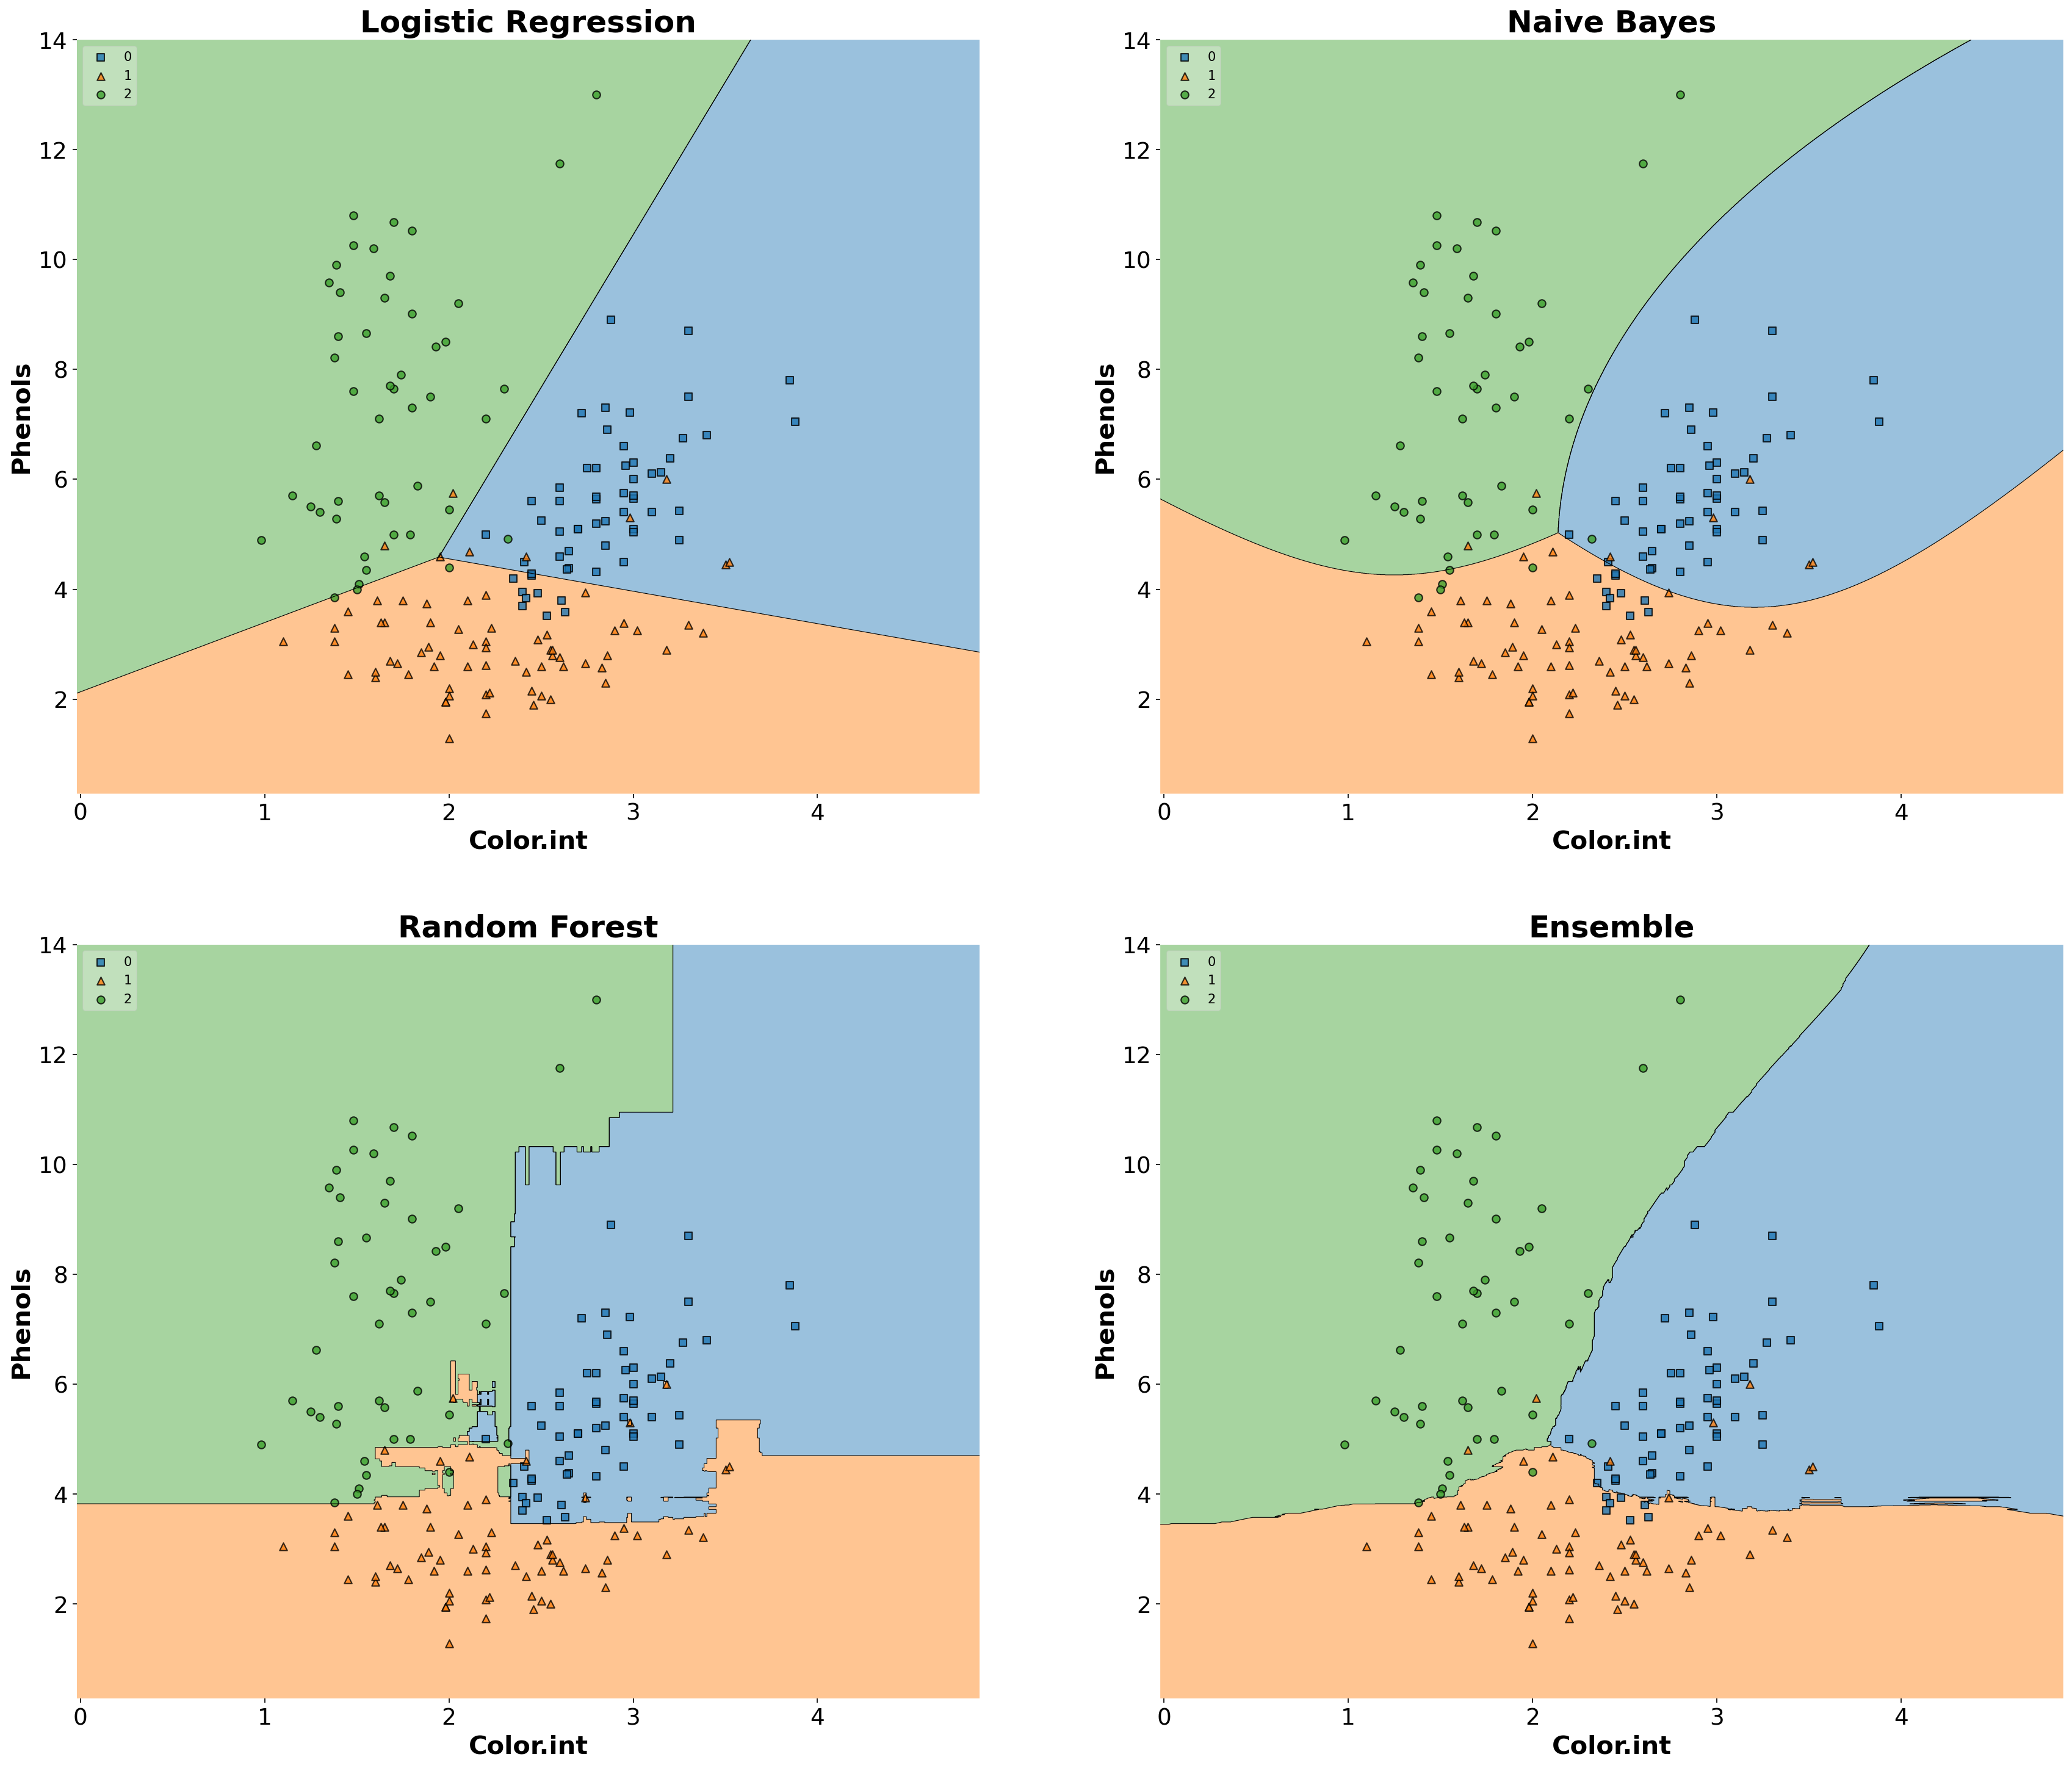

In [11]:
from mlxtend.plotting import plot_decision_regions
from itertools import product  # Used to generate indices for figure subplots!

fig, axs = plt.subplots(2, 2, figsize=(28, 24), sharey=True)

for classifier, grid in zip(
    all_classifiers,
    product([0, 1], [0, 1])  # generate [(0, 0), (0, 1), (1, 0), (1, 1)]
):
    clf_name, clf = classifier[0], classifier[1]
    ax = axs[grid[0], grid[1]]

    clf.fit(X_2d, y)
    
    plot_decision_regions(
        X=X_2d, 
        y=y, 
        clf=clf, 
        legend=2, 
        ax=ax
    )

    ax.set_title(clf_name, fontsize=24, fontweight="bold")
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel("Color.int", fontsize=20, fontweight="bold")
    ax.set_ylabel("Phenols", fontsize=20, fontweight="bold")
    
fig.savefig("all_classifiers_decision_regions.png", **savefig_options)

### Matrix of Scatter Plots
Another useful tool from MLxtend is the ability to draw a matrix of scatter plots for features (using [*scatterplotmatrix()*](https://rasbt.github.io/mlxtend/user_guide/plotting/scatterplotmatrix/)). In order to add another dimension to the scatter plots, we can also assign different colors for different target classes. 

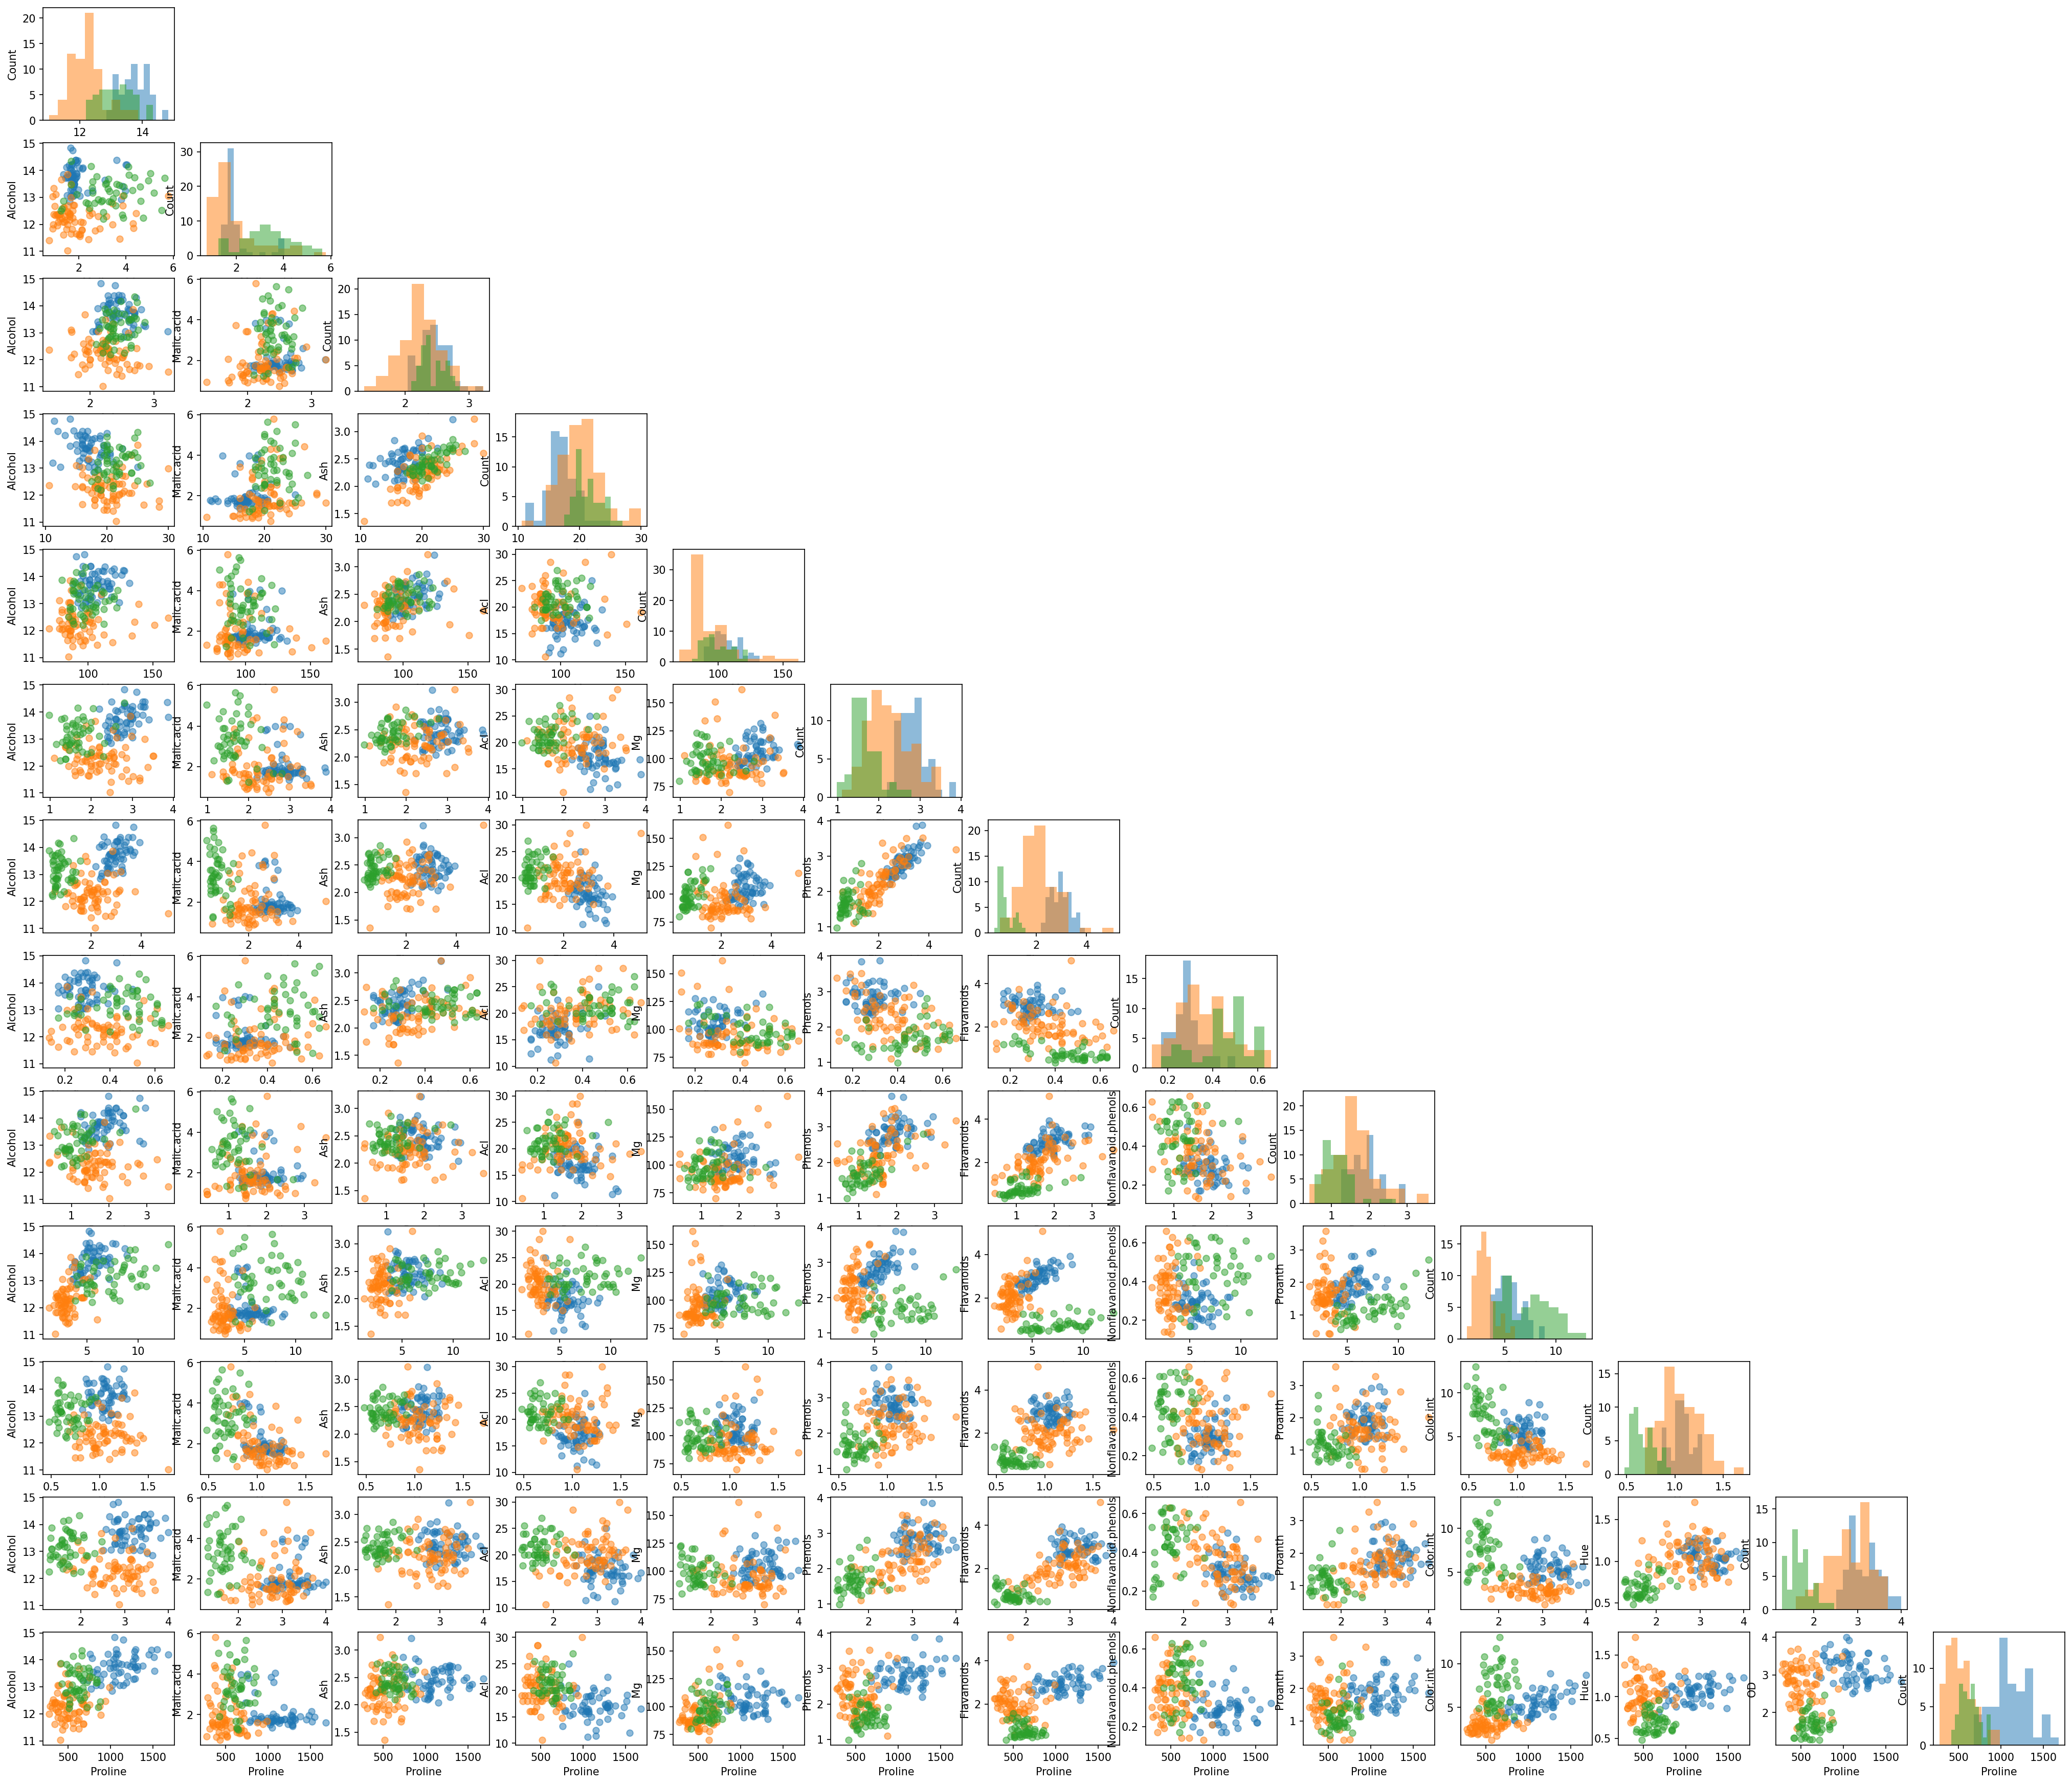

In [12]:
from mlxtend.plotting import scatterplotmatrix

fig, axes = scatterplotmatrix(X[y==0], figsize=(34, 30), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=attribute_names)

fig.savefig("matrix_scatter_plots.png", **savefig_options)

By the way, for plotting similar scatter plots, you can also use Pandas' [*scatter_matrix()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) or seaborn's [*pairplot()*](https://seaborn.pydata.org/generated/seaborn.pairplot.html) functions.

### Bootstrapping

The [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) is an easy way to estimate a sample statistic and generate the corresponding confidence interval by drawing [random samples with replacement](https://en.wikipedia.org/wiki/Sampling_(statistics)#Replacement_of_selected_units). For this, you can use the [*bootstrap()*](https://rasbt.github.io/mlxtend/user_guide/evaluate/bootstrap/) function from the library. Note that you can pass a custom statistic to the bootstrap function through argument `func`. The custom function must return a scalar value. 

In [13]:
from mlxtend.evaluate import bootstrap
# Generating 100 random data with a mean of 5

random_data = np.random.RandomState(123).normal(loc=5., size=100)

avg, std_err, ci_bounds = bootstrap(
    random_data, 
    num_rounds=1000, 
    func=np.mean,  # A function to compute a sample statistic can be passed here
    ci=0.95, 
    seed=123
)

print(
    f"Mean: {avg.round(2)} \n"
    f"Standard Error: +/- {std_err.round(2)} \n"
    f"CI95: [{ci_bounds[0].round(2)}, {ci_bounds[1].round(2)}]"
)

Mean: 5.03 
Standard Error: +/- 0.11 
CI95: [4.8, 5.26]


## Conclusion
In this post, we went over several MLxtend library functionalities, in particular, we talked about creating counterfactual instances for better model interpretability and plotting decision regions for classifiers, drawing PCA correlation circle, analyzing bias-variance tradeoff through decomposition, drawing a matrix of scatter plots of features with colored targets, and implementing the bootstrapping. The library is a nice addition to your data science toolbox, and I recommend giving this library a try.

Thanks for reading!

___If you liked this post, you can [join my mailing list here](https://www.ealizadeh.com/subscribe/) to receive more posts about Data Science, Machine Learning, Statistics, and interesting Python libraries and tips & tricks. You can also follow me on my [website](https://ealizadeh.com/), [Medium](https://medium.com/@ealizadeh), [LinkedIn](https://www.linkedin.com/in/alizadehesmaeil/), or [Twitter](https://twitter.com/es_alizadeh).___

## References
[1] Sebastian Raschka, [MLxtend](https://rasbt.github.io/mlxtend/) 

[2] Sebastian Raschka, [Create Counterfactual](https://rasbt.github.io/mlxtend/user_guide/evaluate/create_counterfactual/), MLxtend API documentation

[3] S. Wachter et al (2018), [Counterfactual Explanations without Opening the Black Box: Automated Decisions and the GDPR](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3063289), 31(2), Harvard Journal of Law & Technology

[4] Wikipedia, [Bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias-variance_tradeoff)

[5] Sebastian Raschka, [Bias-Variance Decomposition](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/), MLxtend API documentation